# Week 2: EDA Assignment on the Weather Dataset Analysis

In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
df = pd.read_csv('1. Weather Data.csv')

In [371]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [373]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


# Question 1: Data Overview and Cleaning

In [376]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [378]:
df.shape

(8784, 8)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [382]:
df.isna().sum().sum()

0

In [384]:
df.duplicated().sum()

0

### key features of the dataset:
1. The dataset contains 8784 rows and 8 columns (8784 records and 8 features). Also, the dataset incorporates the a mixture of numerical ('int64 (2), float64 (4)) and  categorical (object (2) data types.
2. There are no missing (null) values in the dataset, thus no imputation (removal) needed.
3. There are no duplicate records in the dataset, thus no handling needed

# Question 2: Statistical Summary

In [388]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


## Statistical summary of the dataset
The dataset's statistical summary reveals the distribution of several weather-related variables. The average temperature is 8.8°C, with a median of 9.3°C, suggesting a slightly skewed distribution. The standard deviation of 11.7°C indicates moderate variability in temperature, ranging from a minimum of -23.3°C to a maximum of 33.0°C. Dew point temperature, which averages 2.6°C, shows significant variability with a standard deviation of 10.9°C. Relative humidity has a high mean of 67.4%, with considerable variation, as reflected by its standard deviation of 16.9%. Wind speed averages 14.9 km/h but can reach up to 83 km/h, demonstrating its wide range. Visibility typically hovers around 27.7 km, but some instances report zero visibility, which is concerning. The atmospheric pressure is relatively stable, averaging 101.05 kPa with minimal variation.

## Identification and Description of Outliers
Significant outliers are observed in the dataset, particularly with temperature, wind speed, and visibility. The minimum temperature of -23.3°C and maximum of 33.0°C suggest extreme cold and heat instances that are uncommon. Similarly, a wind speed of 83 km/h and visibility of 0 km are unusual and likely represent severe weather conditions. These outliers could significantly impact any predictive modeling or analysis if not appropriately handled.

# Question 3: Data Visualization

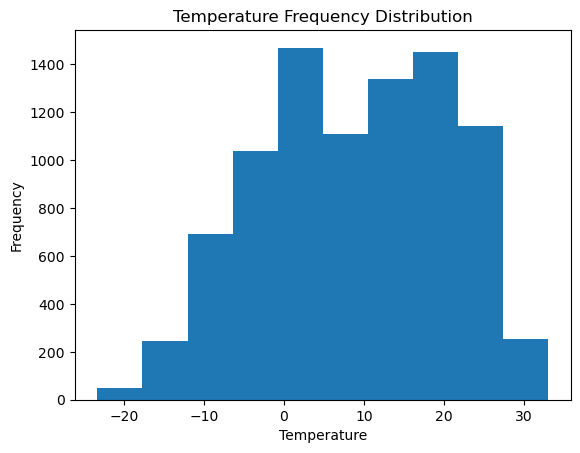

In [393]:
plt.hist(df['Temp_C'])
plt.xlabel ('Temperature')
plt.ylabel('Frequency');
plt.title('Temperature Frequency Distribution');

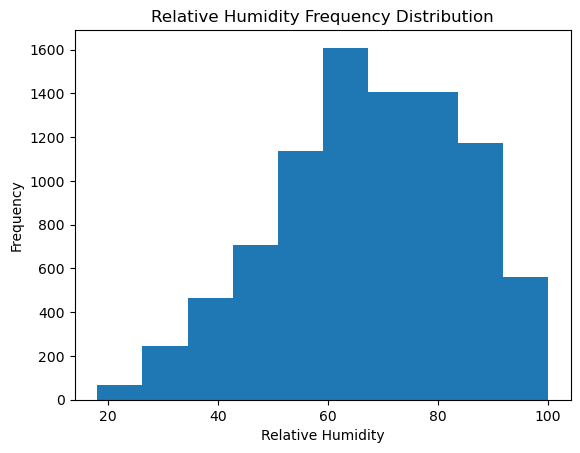

In [395]:
plt.hist(df['Rel Hum_%'])
plt.xlabel ('Relative Humidity')
plt.ylabel('Frequency');
plt.title('Relative Humidity Frequency Distribution');

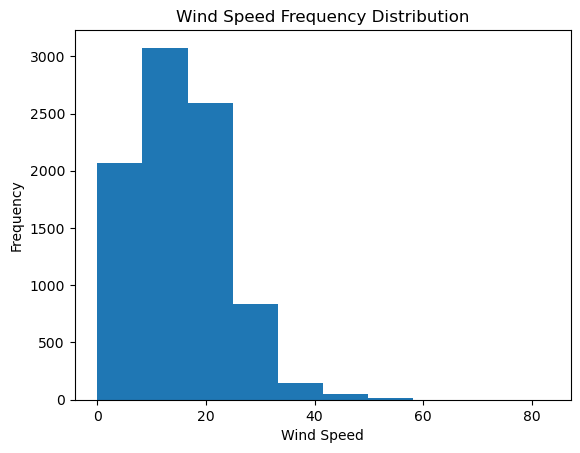

In [397]:
plt.hist(df['Wind Speed_km/h'])
plt.xlabel ('Wind Speed')
plt.ylabel('Frequency');
plt.title('Wind Speed Frequency Distribution');

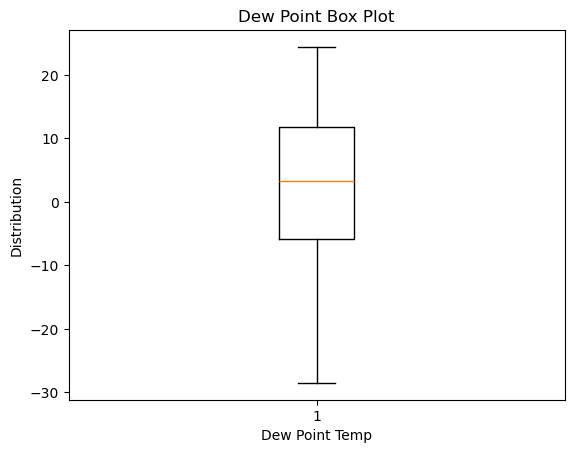

In [399]:
plt.boxplot(df['Dew Point Temp_C'])
plt.xlabel('Dew Point Temp')
plt.ylabel('Distribution');
plt.title('Dew Point Box Plot');

In [401]:
##converting Date/Time from object to datetime data type.
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [403]:
df['Date/Time'].dtype

dtype('<M8[ns]')

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date/Time         8784 non-null   datetime64[ns]
 1   Temp_C            8784 non-null   float64       
 2   Dew Point Temp_C  8784 non-null   float64       
 3   Rel Hum_%         8784 non-null   int64         
 4   Wind Speed_km/h   8784 non-null   int64         
 5   Visibility_km     8784 non-null   float64       
 6   Press_kPa         8784 non-null   float64       
 7   Weather           8784 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 549.1+ KB


### Time Series Graphs

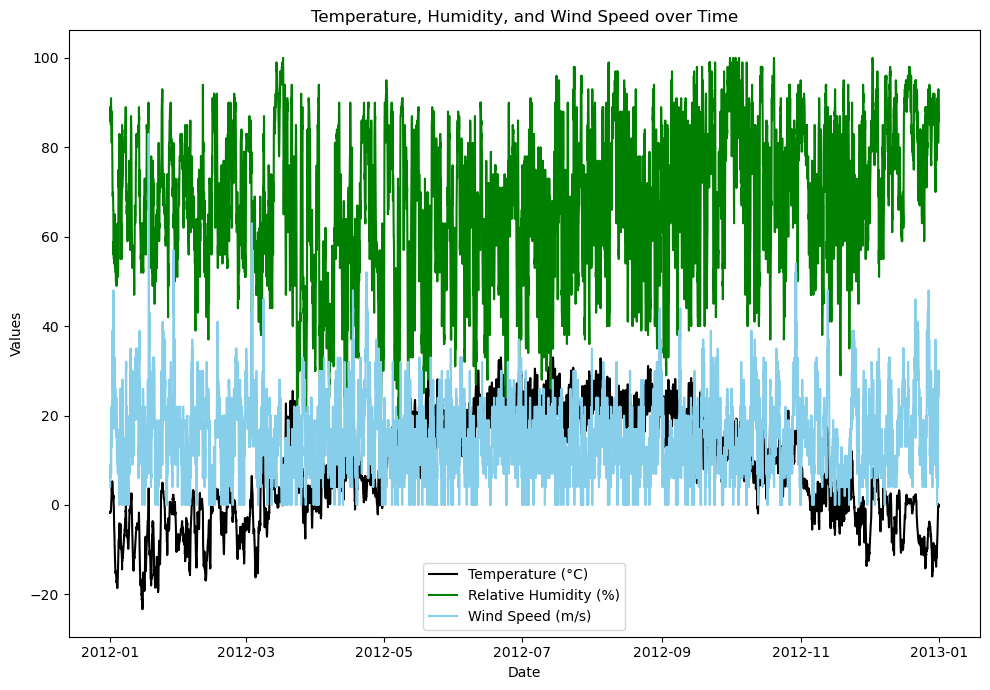

In [408]:
# Plot temperature, humidity, and wind speed over time
plt.figure(figsize=(10,7))
# Plot Temperature
plt.plot(df['Date/Time'], df['Temp_C'], color='black', label='Temperature (°C)')
# Plot Humidity
plt.plot(df['Date/Time'], df['Rel Hum_%'], color='green', label='Relative Humidity (%)')
# Plot Wind Speed
plt.plot(df['Date/Time'], df['Wind Speed_km/h'], color='skyblue', label='Wind Speed (m/s)')
# Title and labels
plt.title('Temperature, Humidity, and Wind Speed over Time')
plt.xlabel('Date')
plt.ylabel('Values')
# Show legend
plt.legend()
# Adjust layout and display plot
plt.tight_layout()
plt.show()

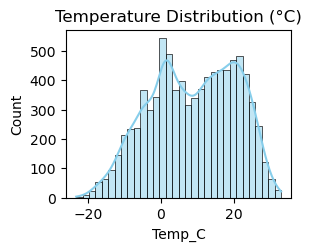

In [410]:
plt.subplot(2, 2, 1)
sns.histplot(df['Temp_C'], kde=True, color='skyblue');
plt.title('Temperature Distribution (°C)');

In [412]:
corr_matrix=df[['Temp_C','Dew Point Temp_C','Rel Hum_%','Wind Speed_km/h','Press_kPa']].corr()

In [414]:
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,-0.356613
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,1.000000


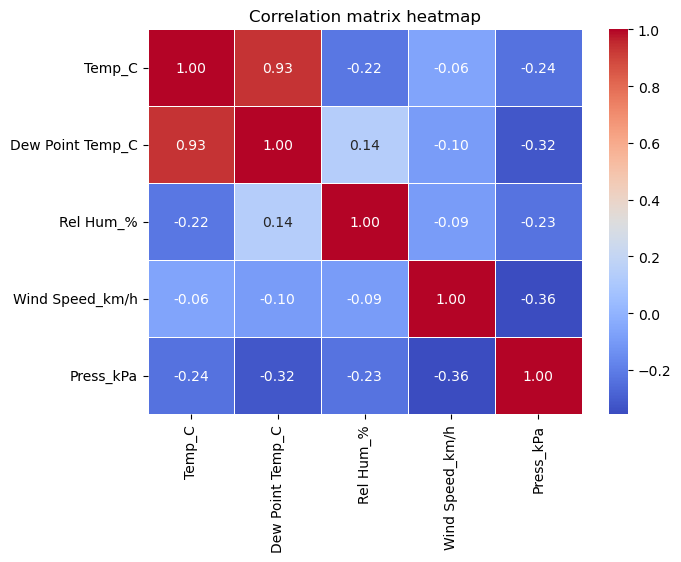

In [416]:
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Correlation matrix heatmap')
plt.show()

# Question 4: Weather Patterns and Trends


1. *Temperature (Black):*
   - *Seasonal Variation:* The temperature appears to fluctuate significantly throughout the year, with noticeable peaks and troughs. Typically, the warmest periods are likely in the summer months (around mid-year), while cooler temperatures are observed during winter (at the beginning and end of the year).
   - *Range:* The temperature varies between approximately -20°C and 40°C, indicating significant seasonal changes.

2. *Relative Humidity (Green Line):*
   - *High Consistency:* The relative humidity remains relatively high throughout the year, often ranging between 60% to 100%. This suggests a consistently humid environment, likely with some seasonal variation.
   - *Possible Seasonal Influence:* There might be slight variations correlating with temperature changes, where humidity slightly dips during warmer periods.

3. *Wind Speed (Skyblue Line):*
   - *Lower and Stable:* Wind speed is generally low compared to temperature and humidity, often remaining below 20 m/s. 
   - *Less Variation:* The wind speed shows less fluctuation and appears more stable, with only occasional spikes throughout the year.

### *Anomalies and Unusual Patterns:*
- *Sudden Spikes in Wind Speed:* There are a few noticeable spikes in wind speed, which may indicate storms or unusual weather events. These spikes do not seem to correlate directly with temperature or humidity changes, suggesting they are isolated incidents.
- *Temperature Fluctuations:* Some sharp dips and rises in temperature could indicate abrupt weather changes, potentially caused by cold fronts or heatwaves. These anomalies might be due to specific regional climatic events.
- *Humidity Peaks and Valleys:* Although generally stable, there are moments where humidity sharply decreases or increases. These could be related to rapid temperature changes or specific weather phenomena like dry spells or rainstorms.

### *Potential Reasons for Anomalies:*
- *Seasonal Transitions:* Anomalies in temperature and humidity could be due to seasonal transitions, such as the shift from winter to spring or summer to fall, where rapid changes in temperature can occur.
- *Weather Events:* The spikes in wind speed could be attributed to weather events like storms, which bring sudden and extreme changes in wind patterns.
- *Geographical Factors:* The location's geography could influence these patterns, with mountainous regions, coastal areas, or plains experiencing different weather extremes

# Question 5: Insights and Conclusions


### Key Insights from EDA
#### Temperature Distribution: 
The temperature data exhibits a normal distribution with some extreme values, reflecting typical climate patterns with occasional anomalies.
#### Humidity and Wind Speed Distribution:
Relative humidity leans towards higher percentages, indicating a generally humid environment, while wind speed displays more variability.
#### Dew Point Temperature:
The boxplot analysis reveals outliers in dew point temperature, suggesting potential extreme weather conditions.
#### Time Series Analysis:
The time series plots of temperature, humidity, and wind speed demonstrate clear trends and patterns over time, with temperature and humidity showing inverse relationships, possibly due to weather fronts or seasonal changes.
#### Correlation Analysis:
The heatmap reveals significant correlations between temperature, dew point temperature, and pressure, suggesting that changes in one could predict changes in another, which is valuable for weather forecasting.

## Practical Applications
#### Weather Prediction: 
The identified correlations between variables like temperature, humidity, and pressure can enhance short-term weather forecasting models.
#### Climate Monitoring:
Patterns and anomalies identified in the data can be useful for monitoring climate trends and detecting unusual weather events.
#### Operational Planning: 
Insights from the data can inform decision-making in weather-sensitive sectors, such as agriculture and aviation.

# Question 6: Recommendations for Further Analysis


1. *Seasonal Decomposition:* Decomposing the time series data to isolate the seasonal component, trend, and noise could improve the accuracy of weather forecasting models.
2. *Anomaly Detection:* Investigating the outliers in temperature and dew point could provide insights into extreme weather events or data recording errors.
3. *Modeling Relationships:* Developing predictive models based on the identified correlations (e.g., regression models) could help forecast weather variables.
4. *Additional Data:* Incorporating external data sources such as geographical information, solar radiation, or historical climate data could enrich the analysis and enhance weather prediction accuracy.
5. *Long-Term Trends:* Analyzing long-term trends in the data could provide insights into potential climate change impacts.